<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/DS9_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

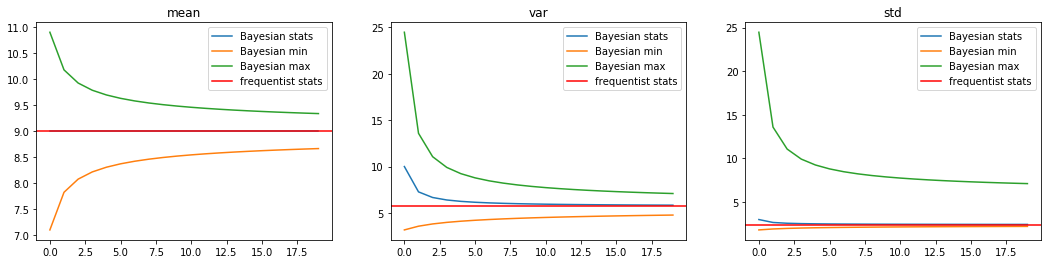

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

seed = [6, 9, 12, 7, 8, 8, 13]

# frequentist
mean1, var1, std1 = np.mean(data), np.var(data), np.std(data)

# bayesian
mean2, var2, std2 = [], [], []
for i in range(1, 21):
    data = seed * i
    mean, var, std = stats.bayes_mvs(data)
    mean2.append([mean[0], mean[1][0], mean[1][1]])
    var2.append([var[0], var[1][0], var[1][1]])
    std2.append([std[0], std[1][0], var[1][1]])

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes[0].plot(mean2, label='*')
axes[1].plot(var2, label='*')
axes[2].plot(std2, label='*')
axes[0].axhline(mean1, color='r', label='*')
axes[1].axhline(var1, color='r', label='*')
axes[2].axhline(std1, color='r', label='*')

labels = ['Bayesian stats','Bayesian min',
          'Bayesian max', 'frequentist stats']
for i in range(3):
    handles, _ = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=labels)

axes[0].set_title('mean')
axes[1].set_title('var')
axes[2].set_title('std');

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html   

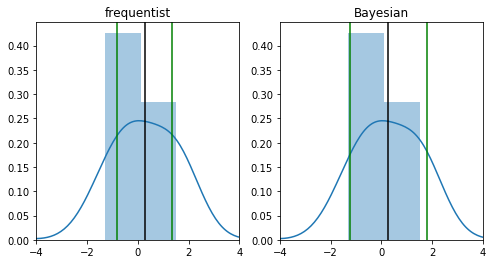

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

def compare(n_samples=10):
    data = stats.norm.rvs(size=n_samples)
    # Bayesian
    res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    # frequentist
    frq_mean = np.mean(data)
    frq_var = stats.norm.var(data)
    frq_std = np.std(data)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
    sns.distplot(data, ax=ax0)
    sns.distplot(data, ax=ax1)
    ax0.set_title('frequentist')
    ax1.set_title('Bayesian')
    ax0.set_xlim(-4, 4)
    ax1.set_xlim(-4, 4)

    ax0.axvline(x=frq_mean, color='k')
    ax0.axvline(x=frq_mean-frq_std, color='g')
    ax0.axvline(x=frq_mean+frq_std, color='g')

    ax1.axvline(x=res_mean[0], color='k')
    ax1.axvline(x=res_mean[0]-res_std[0], color='g')
    ax1.axvline(x=res_mean[0]+res_std[0], color='g');

compare(n_samples=5)

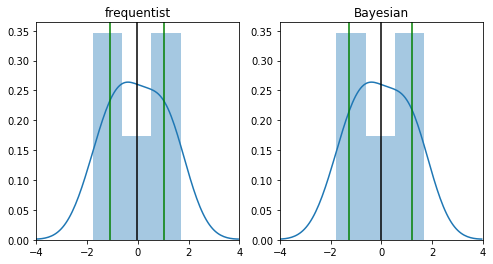

In [0]:
compare(n_samples=10)

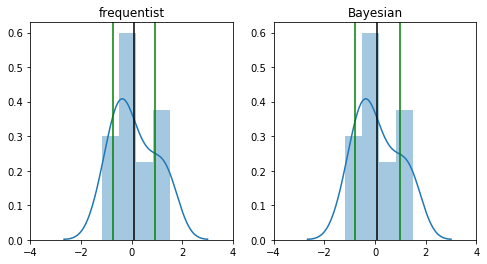

In [0]:
compare(n_samples=20)

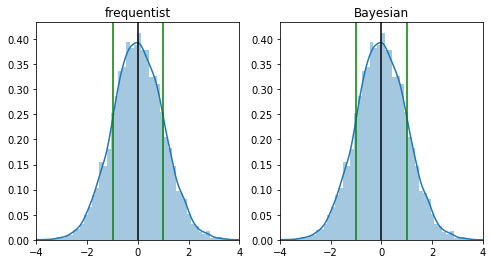

In [0]:
compare(n_samples=10000)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)